# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.773776,0.00
1,2,0.769850,0.07
2,2,0.770518,0.14
3,2,0.770060,0.21
4,2,0.767169,0.28
...,...,...,...
1296,2,0.764904,90.72
1297,2,0.764172,90.79
1298,2,0.776256,90.86
1299,2,0.774453,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.05497122305937319
Difference between highest and base accuracy: 0.03830456864884113
Difference between lowest and base accuracy: -0.016666654410532056


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.812081,0.757109,0.773776,0.054971,0.038305,-0.016667


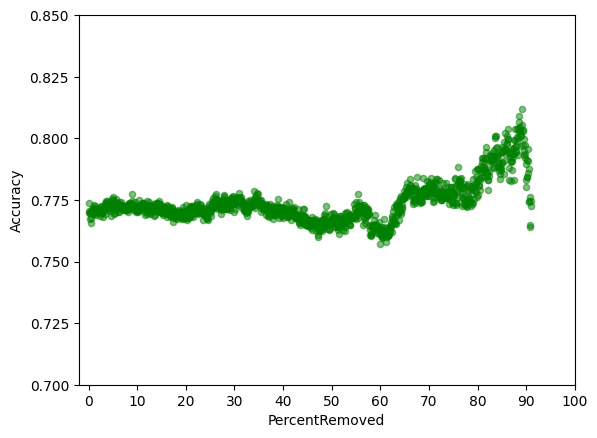

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Decision Tree

In [ ]:
ds_model_dtn = read_output_files(out_path)
ds_model_dtn_srt = ds_model_dtn.sort_values(by='PercentRemoved')
ds_model_dtn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.756029,0.00
1,2,0.761701,0.07
2,2,0.762886,0.14
3,2,0.761377,0.21
4,2,0.759527,0.28
...,...,...,...
1296,2,0.751406,90.72
1297,2,0.750567,90.79
1298,2,0.762557,90.86
1299,2,0.764097,90.93


In [ ]:
hg_acc_dt = ds_model_dtn_srt['Accuracy'].max()
lw_acc_dt = ds_model_dtn_srt['Accuracy'].min()
base_acc_dt = ds_model_dtn_srt['Accuracy'].iloc[0]


acc_hl_dt = hg_acc_dt - lw_acc_dt
acc_hb_dt = hg_acc_dt - base_acc_dt
acc_lb_dt = lw_acc_dt - base_acc_dt

print("Difference between highest and lowest accuracy:", acc_hl_dt)
print("Difference between highest and base accuracy:", acc_hb_dt)
print("Difference between lowest and base accuracy:", acc_lb_dt)

dtkeyval = {
    'high_acc': [hg_acc_dt],
    'low_acc': [lw_acc_dt],
    'base_acc': [base_acc_dt],
    'diff_high_low': [acc_hl_dt],
    'diff_high_base': [acc_hb_dt],
    'diff_low_base': [acc_lb_dt]
}

dataf_dt = pd.DataFrame(dtkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.04712082141417995
Difference between highest and base accuracy: 0.03867317372646695
Difference between lowest and base accuracy: -0.008447647687713


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.794702,0.747581,0.756029,0.047121,0.038673,-0.008448


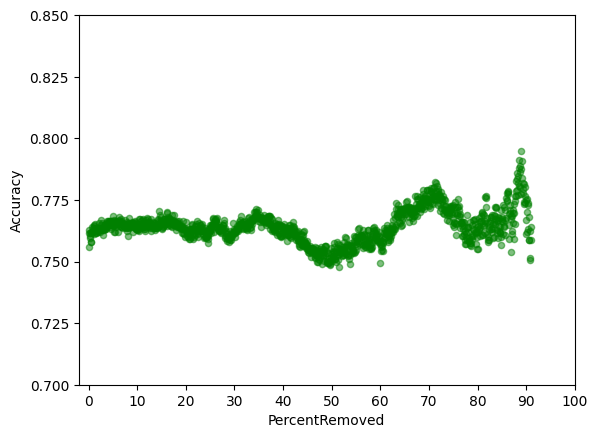

In [ ]:
ds_model_dtn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Bagging

In [ ]:
ds_model_bgn = read_output_files(out_path)
ds_model__bgn_srt = ds_model_bgn.sort_values(by='PercentRemoved')
ds_model__bgn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.744859,0.00
1,2,0.743105,0.07
2,2,0.744590,0.14
3,2,0.744639,0.21
4,2,0.742044,0.28
...,...,...,...
1296,2,0.733408,90.72
1297,2,0.736961,90.79
1298,2,0.742009,90.86
1299,2,0.745685,90.93


In [ ]:
hg_acc_bg = ds_model__bgn_srt['Accuracy'].max()
lw_acc_bg = ds_model__bgn_srt['Accuracy'].min()
base_acc_bg = ds_model__bgn_srt['Accuracy'].iloc[0]


acc_hl_bg = hg_acc_bg - lw_acc_bg
acc_hb_bg = hg_acc_bg - base_acc_bg
acc_lb_bg = lw_acc_bg - base_acc_bg

print("Difference between highest and lowest accuracy:", acc_hl_bg)
print("Difference between highest and base accuracy:", acc_hb_bg)
print("Difference between lowest and base accuracy:", acc_lb_bg)

bgkeyval = {
    'high_acc': [hg_acc_bg],
    'low_acc': [lw_acc_bg],
    'base_acc': [base_acc_bg],
    'diff_high_low': [acc_hl_bg],
    'diff_high_base': [acc_hb_bg],
    'diff_low_base': [acc_lb_bg]
}

dataf_bg = pd.DataFrame(bgkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.04002458552399335
Difference between highest and base accuracy: 0.021200899178522192
Difference between lowest and base accuracy: -0.018823686345471158


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.766059,0.726035,0.744859,0.040025,0.021201,-0.018824


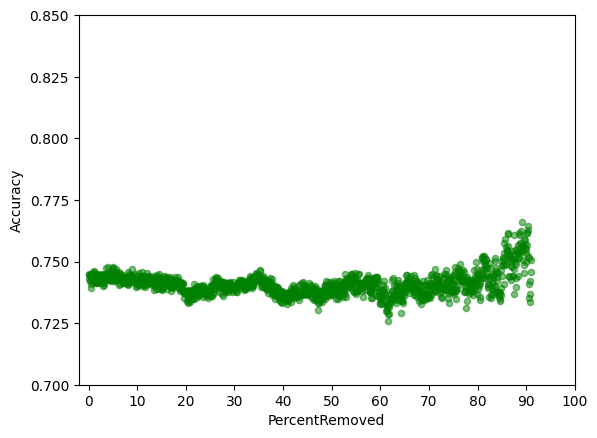

In [ ]:
ds_model__bgn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Random Forest

In [ ]:
ds_model_rfn = read_output_files(out_path)
ds_model_rfn_srt = ds_model_rfn.sort_values(by='PercentRemoved')
ds_model_rfn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.764380,0.00
1,2,0.766298,0.07
2,2,0.767904,0.14
3,2,0.766817,0.21
4,2,0.763505,0.28
...,...,...,...
1296,2,0.752531,90.72
1297,2,0.753968,90.79
1298,2,0.764840,90.86
1299,2,0.760644,90.93


In [ ]:
hg_acc_rf = ds_model_rfn_srt['Accuracy'].max()
lw_acc_rf = ds_model_rfn_srt['Accuracy'].min()
base_acc_rf = ds_model_rfn_srt['Accuracy'].iloc[0]


acc_hl_rf = hg_acc_rf - lw_acc_rf
acc_hb_rf = hg_acc_rf - base_acc_rf
acc_lb_rf = lw_acc_rf - base_acc_rf

print("Difference between highest and lowest accuracy:", acc_hl_rf)
print("Difference between highest and base accuracy:", acc_hb_rf)
print("Difference between lowest and base accuracy:", acc_lb_rf)

rfkeyval = {
    'high_acc': [hg_acc_rf],
    'low_acc': [lw_acc_rf],
    'base_acc': [base_acc_rf],
    'diff_high_low': [acc_hl_rf],
    'diff_high_base': [acc_hb_rf],
    'diff_low_base': [acc_lb_rf]
}

dataf_rf = pd.DataFrame(rfkeyval)
dataf_rf

Difference between highest and lowest accuracy: 0.03749782954982983
Difference between highest and base accuracy: 0.025648347690903073
Difference between lowest and base accuracy: -0.011849481858926758


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.790029,0.752531,0.76438,0.037498,0.025648,-0.011849


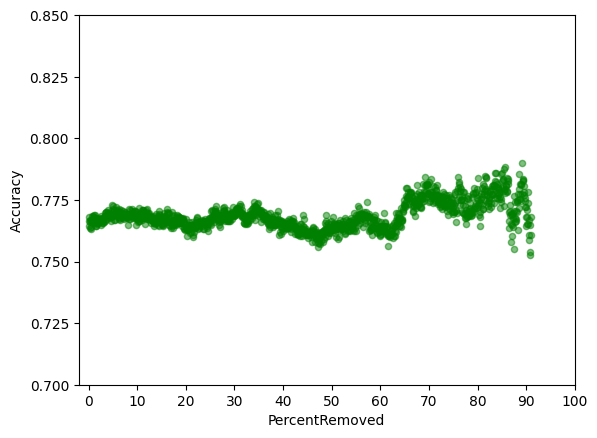

In [ ]:
ds_model_rfn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()